<a href="https://colab.research.google.com/github/midounai/titanic-analysis/blob/main/Day01_%E5%B0%88%E9%A1%8C%E5%AF%A6%E4%BD%9C_01%EF%BC%9A%E9%90%B5%E9%81%94%E5%B0%BC%E8%99%9F%E5%AD%98%E6%B4%BB%E9%A0%90%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import files
# 上傳CSV
uploaded = files.upload()


Saving train.csv to train.csv
Saving test.csv to test.csv


In [3]:
import io
df_train = pd.read_csv('train.csv')     
df_test = pd.read_csv('test.csv')

## 檢視資料

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
cor=df_train.corr()

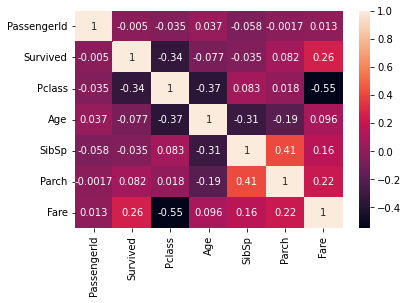

In [7]:
sns.heatmap(cor,annot=True)

In [8]:
def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

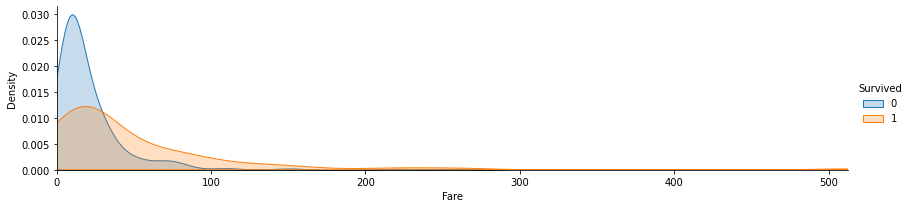

In [9]:
plot_distribution( df_train , var = 'Fare' , target = 'Survived' )
plt.show()

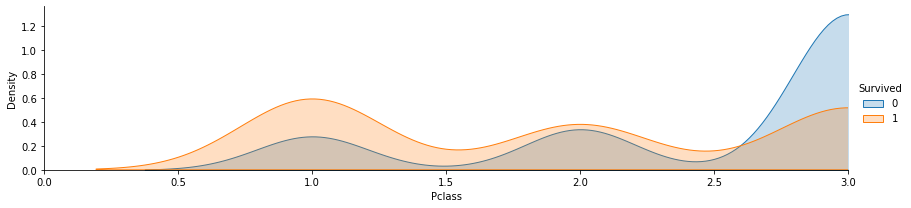

In [10]:
plot_distribution( df_train , var = 'Pclass' , target = 'Survived' )
plt.show()

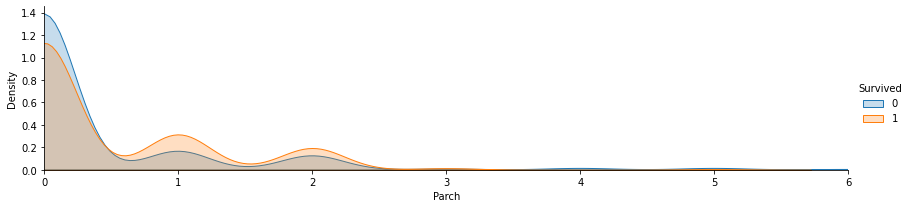

In [11]:
plot_distribution( df_train , var = 'Parch' , target = 'Survived' )
plt.show()

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 資料前處理

In [13]:
df_train=pd.get_dummies(df_train,columns=['Sex'])


In [14]:
df_train=pd.get_dummies(df_train,columns=['Embarked'])

In [15]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1


In [16]:
df_train['Title Row'] = df_train['Name'].map( lambda name: name.split( ',' )[1].split( '.' )[0].strip() )

title_encoding = {
  "Capt":        "Officer",
  "Col":        "Officer",
  "Major":       "Officer",
  "Jonkheer":     "Royalty",
  "Don":        "Royalty",
  "Sir" :       "Royalty",
  "Dr":         "Officer",
  "Rev":        "Officer",
  "the Countess":   "Royalty",
  "Dona":        "Royalty",
  "Mme":        "Mrs",
  "Mlle":        "Miss",
  "Ms":         "Mrs",
  "Mr" :        "Mr",
  "Mrs" :       "Mrs",
  "Miss" :       "Miss",
  "Master" :      "Master",
  "Lady" :       "Royalty"
}

df_train['Title'] = df_train['Title Row'].map(title_encoding)
df_train['Title']

0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
        ...   
886    Officer
887       Miss
888       Miss
889         Mr
890         Mr
Name: Title, Length: 891, dtype: object

In [17]:
df_Title_ohe = pd.get_dummies(df_train['Title'], prefix='Title_')
df_Title_ohe

,Title__Master,Title__Miss,Title__Mr,Title__Mrs,Title__Officer,Title__Royalty
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,0,1,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
886,0,0,0,0,1,0
887,0,1,0,0,0,0
888,0,1,0,0,0,0
889,0,0,1,0,0,0


In [18]:
df_train = df_train.join(df_Title_ohe)
df_train

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Embarked_Q,Embarked_S,Title Row,Title,Title__Master,Title__Miss,Title__Mr,Title__Mrs,Title__Officer,Title__Royalty
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,...,0,1,Mr,Mr,0,0,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,...,0,0,Mrs,Mrs,0,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,0,1,Miss,Miss,0,1,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,...,0,1,Mrs,Mrs,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,...,0,1,Mr,Mr,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,...,0,1,Rev,Officer,0,0,0,0,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,...,0,1,Miss,Miss,0,1,0,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,...,0,1,Miss,Miss,0,1,0,0,0,0
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,...,0,0,Mr,Mr,0,0,1,0,0,0


In [19]:
df_train['FamilySize'] = df_train['Parch'] + df_train['SibSp'] + 1
df_train['FamilySize']

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: FamilySize, Length: 891, dtype: int64

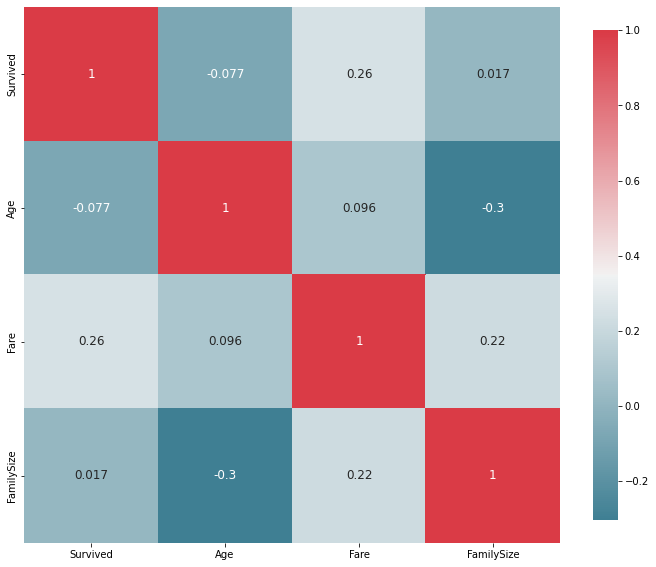

In [20]:
corr = df_train[['Survived', 'Age', 'Fare', 'FamilySize']].corr()
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax = plt.subplots( figsize =( 12 , 10 ) )[1],
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
)

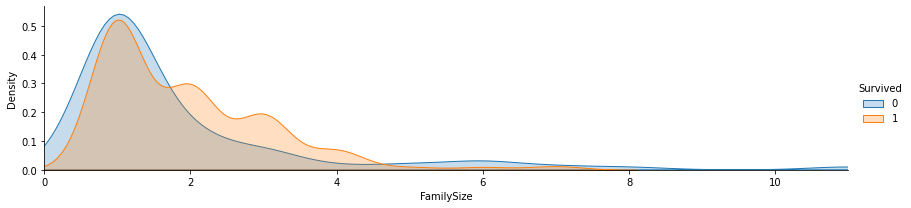

In [21]:
plot_distribution( df_train , var = 'FamilySize' , target = 'Survived' )
plt.show()

In [22]:
df_train['Family_Single'] = df_train[ 'FamilySize' ].map( lambda s : 1 if s == 1 else 0 )
df_train['Family_Small']  = df_train[ 'FamilySize' ].map( lambda s : 1 if 2 <= s <= 4 else 0 )
df_train['Family_Large']  = df_train[ 'FamilySize' ].map( lambda s : 1 if 5 <= s else 0 )

def FamilySizeTranform(s):
  if s >= 1 and s <= 3:
    return 3
  if s >= 4 and s <= 6:
    return 2
  return 1

df_train['FamilySizeEncoding'] = df_train[ 'FamilySize' ].map(FamilySizeTranform)

df_train

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Title__Miss,Title__Mr,Title__Mrs,Title__Officer,Title__Royalty,FamilySize,Family_Single,Family_Small,Family_Large,FamilySizeEncoding
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,...,0,1,0,0,0,2,0,1,0,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,...,0,0,1,0,0,2,0,1,0,3
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,1,0,0,0,0,1,1,0,0,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,...,0,0,1,0,0,2,0,1,0,3
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,...,0,1,0,0,0,1,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,...,0,0,0,1,0,1,1,0,0,3
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,...,1,0,0,0,0,1,1,0,0,3
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,...,1,0,0,0,0,4,0,1,0,2
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,...,0,1,0,0,0,1,1,0,0,3


In [23]:
df_train.groupby('FamilySizeEncoding').size()


FamilySizeEncoding
1     25
2     66
3    800
dtype: int64

In [24]:
def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


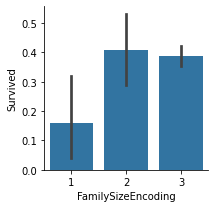

In [25]:
plot_categories( df_train , cat = 'FamilySizeEncoding' , target = 'Survived' )
plt.show()

In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         891 non-null    int64  
 1   Survived            891 non-null    int64  
 2   Pclass              891 non-null    int64  
 3   Name                891 non-null    object 
 4   Age                 714 non-null    float64
 5   SibSp               891 non-null    int64  
 6   Parch               891 non-null    int64  
 7   Ticket              891 non-null    object 
 8   Fare                891 non-null    float64
 9   Cabin               204 non-null    object 
 10  Sex_female          891 non-null    uint8  
 11  Sex_male            891 non-null    uint8  
 12  Embarked_C          891 non-null    uint8  
 13  Embarked_Q          891 non-null    uint8  
 14  Embarked_S          891 non-null    uint8  
 15  Title Row           891 non-null    object 
 16  Title   

In [27]:
df_train=df_train.fillna(df_train.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [28]:
df_train

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Title__Miss,Title__Mr,Title__Mrs,Title__Officer,Title__Royalty,FamilySize,Family_Single,Family_Small,Family_Large,FamilySizeEncoding
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,NaN,...,0,1,0,0,0,2,0,1,0,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,C85,...,0,0,1,0,0,2,0,1,0,3
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,NaN,...,1,0,0,0,0,1,1,0,0,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,C123,...,0,0,1,0,0,2,0,1,0,3
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,NaN,...,0,1,0,0,0,1,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,NaN,...,0,0,0,1,0,1,1,0,0,3
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,B42,...,1,0,0,0,0,1,1,0,0,3
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,NaN,...,1,0,0,0,0,4,0,1,0,2
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,C148,...,0,1,0,0,0,1,1,0,0,3


In [29]:
df_trained=df_train[[
           'Survived','Pclass','Age','SibSp','Parch','Fare','Sex_female','Sex_male','Embarked_C', 'Embarked_Q', 'Embarked_S',
           'FamilySizeEncoding','Title__Master', 'Title__Miss', 'Title__Mr', 'Title__Mrs', 'Title__Officer', 'Title__Royalty'
          ]]

In [30]:
df_trained.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Survived            891 non-null    int64  
 1   Pclass              891 non-null    int64  
 2   Age                 891 non-null    float64
 3   SibSp               891 non-null    int64  
 4   Parch               891 non-null    int64  
 5   Fare                891 non-null    float64
 6   Sex_female          891 non-null    uint8  
 7   Sex_male            891 non-null    uint8  
 8   Embarked_C          891 non-null    uint8  
 9   Embarked_Q          891 non-null    uint8  
 10  Embarked_S          891 non-null    uint8  
 11  FamilySizeEncoding  891 non-null    int64  
 12  Title__Master       891 non-null    uint8  
 13  Title__Miss         891 non-null    uint8  
 14  Title__Mr           891 non-null    uint8  
 15  Title__Mrs          891 non-null    uint8  
 16  Title__O

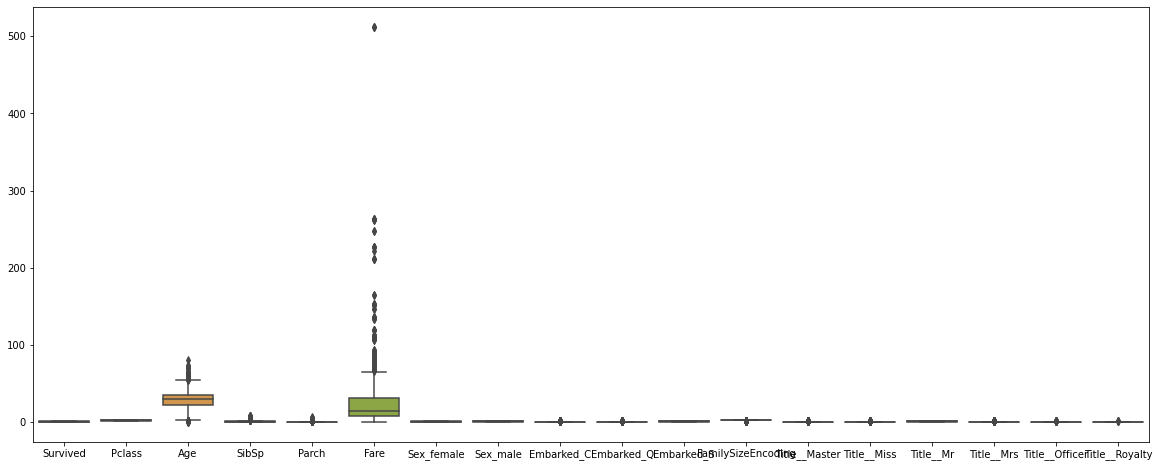

In [40]:
plt.figure(figsize = (20, 8))
sns.boxplot(data = df_trained, width = 0.8)
plt.show()

# 正規化

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_trained.values[:,:])

In [38]:
df_Xscaled = pd.DataFrame(X_scaled,columns=['Survived','Pclass','Age','SibSp','Parch','Fare','Sex_female','Sex_male','Embarked_C', 'Embarked_Q', 'Embarked_S',
           'FamilySizeEncoding','Title__Master', 'Title__Miss', 'Title__Mr', 'Title__Mrs', 'Title__Officer', 'Title__Royalty'])

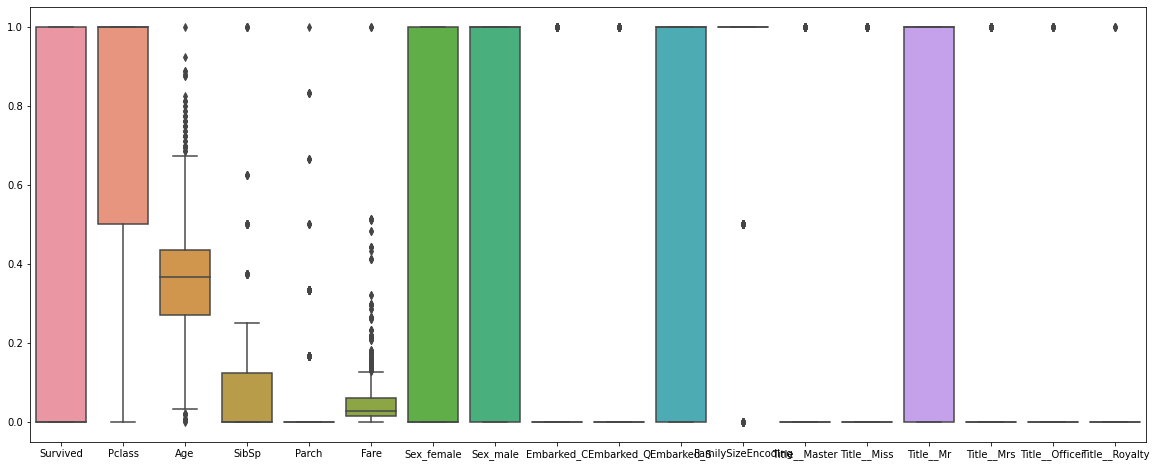

In [39]:
plt.figure(figsize = (20, 8))
sns.boxplot(data = df_Xscaled, width = 0.8)
plt.show()

# 套入模型

In [35]:
columns_X = set(df_Xscaled.columns) - {'Survived'}
columns_y = ['Survived']

train_X = df_Xscaled[columns_X]
train_y = df_Xscaled[columns_y]

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log = LogisticRegression(random_state=0, max_iter=3000)
scores = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy')
print(scores)
print(scores.mean())

[0.82681564 0.82022472 0.80898876 0.79213483 0.85955056]
0.821542903772519


## 試用其他模型

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, df_trained.values[:, -1], test_size = 0.2, random_state=0)

In [47]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train, y_train)

In [48]:
clf.score(X_test, y_test) # Accuracy

0.9888268156424581

# Tensorflow

In [49]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [50]:
model = tf.keras.models.Sequential([
    layers.Dense(32, name="hidden1"),
    layers.Dense(32, name="hidden2"),
    layers.Dense(3, name="output", activation=tf.nn.softmax),
])

In [51]:
model.compile(optimizer='sgd', loss=tf.keras.losses.categorical_crossentropy, metrics=["Accuracy"])

In [52]:
y_train_onehot = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test_onehot = tf.keras.utils.to_categorical(y_test, num_classes=3)

In [53]:
model.fit(X_train, y_train_onehot, epochs=100, batch_size=16)

Epoch 1/100
45/45 [==============================] - 1s 1ms/step - loss: 0.3245 - Accuracy: 0.9522
Epoch 2/100
45/45 [==============================] - 0s 1ms/step - loss: 0.0696 - Accuracy: 0.9958
Epoch 3/100
45/45 [==============================] - 0s 983us/step - loss: 0.0443 - Accuracy: 0.9958
Epoch 4/100
45/45 [==============================] - 0s 1ms/step - loss: 0.0359 - Accuracy: 0.9958
Epoch 5/100
45/45 [==============================] - 0s 1ms/step - loss: 0.0318 - Accuracy: 0.9958
Epoch 6/100
45/45 [==============================] - 0s 1ms/step - loss: 0.0295 - Accuracy: 0.9958
Epoch 7/100
45/45 [==============================] - 0s 977us/step - loss: 0.0278 - Accuracy: 0.9958
Epoch 8/100
45/45 [==============================] - 0s 980us/step - loss: 0.0266 - Accuracy: 0.9958
Epoch 9/100
45/45 [==============================] - 0s 1ms/step - loss: 0.0256 - Accuracy: 0.9958
Epoch 10/100
45/45 [==============================] - 0s 977us/step - loss: 0.0248 - Accuracy: 0.9958
E

In [54]:
loss, acc = model.evaluate(X_test, y_test_onehot)
print("loss_test:", loss)
print("acc_test: ", acc)

6/6 [==============================] - 0s 2ms/step - loss: 0.0146 - Accuracy: 0.9888
loss_test: 0.01462922990322113
acc_test:  0.9888268113136292


## PyTorch


In [55]:
import torch
import torch.nn.functional as F
from sklearn.metrics import accuracy_score

# 創建模型架構
class Model(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Model, self).__init__()
        self.hidden1 = torch.nn.Linear(input_size, hidden_size)
        self.hidden2 = torch.nn.Linear(hidden_size, hidden_size)
        self.predict = torch.nn.Linear(hidden_size, output_size)

    def forward(self, x):
        output1 = self.hidden1(x)
        output2 = self.hidden2(output1)
        output = F.softmax(self.predict(output2))
        return output

# 模型、優化器初始化
model = Model(X_test.shape[1], 32, 3)
optimizer = torch.optim.SGD(model.parameters(), lr=0.05, momentum=0.0) # 模型參數優化器
loss_func = torch.nn.CrossEntropyLoss()

# 資料格式轉成torch專用格式
x_data = torch.tensor(X_train, dtype=torch.float32) # [120, 4]
y_data = torch.tensor(y_train_onehot, dtype=torch.float32) # [120, 3]

# 訓練100回合，
for t in range(100):
    for i in range(0, len(x_data), 16):
        prediction = model(x_data[i:i+16])
        loss = loss_func(prediction, y_data[i:i+16])

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # 檢測訓練資料acc有沒有上升
    loss = loss_func(model(x_data), y_data)
    print(loss)

x_test_data = torch.tensor(X_test, dtype=torch.float32)
y_pred = model(x_test_data)
y_pred = y_pred.argmax(1) # one hot array to int array
accuracy_score(y_test, y_pred.detach().numpy()) # accuracy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


tensor(0.6081, grad_fn=<DivBackward1>)
tensor(0.5684, grad_fn=<DivBackward1>)
tensor(0.5619, grad_fn=<DivBackward1>)
tensor(0.5596, grad_fn=<DivBackward1>)
tensor(0.5585, grad_fn=<DivBackward1>)
tensor(0.5578, grad_fn=<DivBackward1>)
tensor(0.5574, grad_fn=<DivBackward1>)
tensor(0.5571, grad_fn=<DivBackward1>)
tensor(0.5569, grad_fn=<DivBackward1>)
tensor(0.5567, grad_fn=<DivBackward1>)
tensor(0.5566, grad_fn=<DivBackward1>)
tensor(0.5565, grad_fn=<DivBackward1>)
tensor(0.5564, grad_fn=<DivBackward1>)
tensor(0.5563, grad_fn=<DivBackward1>)
tensor(0.5563, grad_fn=<DivBackward1>)
tensor(0.5562, grad_fn=<DivBackward1>)
tensor(0.5562, grad_fn=<DivBackward1>)
tensor(0.5561, grad_fn=<DivBackward1>)
tensor(0.5561, grad_fn=<DivBackward1>)
tensor(0.5561, grad_fn=<DivBackward1>)
tensor(0.5561, grad_fn=<DivBackward1>)
tensor(0.5560, grad_fn=<DivBackward1>)
tensor(0.5560, grad_fn=<DivBackward1>)
tensor(0.5560, grad_fn=<DivBackward1>)
tensor(0.5560, grad_fn=<DivBackward1>)
tensor(0.5560, grad_fn=<D

0.9888268156424581